# Air Traffic

#### A Data Visualization Project

![](https://t3.ftcdn.net/jpg/03/20/38/76/360_F_320387613_OQ2UKxdtvfIKdCBxwLSh1lQAZoULKmyZ.jpg)

This project analyzes and connects three datasets on air transporation: airports, routes, and continents; with the goal of providing graphical information about them. It uses geographical coordinates about airports as well as extense data on the routes that connect them to answer questions about popular airports, airlines, or types of routes.

### Imports and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

C:\Users\sguer\miniconda3\envs\Project 1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Data sources: 
* Global airport and associated data, collected by OpenFlight (https://data.world/tylerudite/airports-airlines-and-routes)
* Country mapping dataset on Kaggle (https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region/code)
* Complete list of IATA airports, by Alexander Bilz (https://github.com/lxndrblz/Airports)

In [19]:
airports = pd.read_csv("airports_complete.csv")
routes = pd.read_csv("routes.csv")
continents = pd.read_csv("continents2.csv")

### Data Preprocessing

#### Airports

In [20]:
airports.head()

code           time_zone_id                                         name  \
0  UGL  Antarctica/South_Pole                Union Glacier Blue-Ice Runway   
1  SXW   Pacific/Port_Moresby                                       Sauren   
2  NDV       America/New_York                                 USN Heliport   
3  EAP          Europe/Zurich  EuroAirport Basel-Mulhouse-Freiburg Airport   
4  NET         America/Nassau                                    New Bight   

  city_code country_id                                       location  \
0       UGL         AQ                  POINT (-83.320833 -79.777778)   
1       SXW         PG                    POINT (148.95305 -5.971389)   
2       NDV         US                           POINT (-77 38.86667)   
3       EAP         CH                         POINT (7.529167 47.59)   
4       NET         BS  POINT (-75.45763803663925 24.314824100000003)   

   elevation  url  icao   city county state  
0       2461  NaN  SCGC    NaN    NaN   NaN  
1        177  NaN  AYSV    NaN    NaN   NaN  
2         19  NaN   NaN    NaN    NaN   NaN  
3        846  NaN   NaN  Basel    NaN   NaN  
4         36  NaN   NaN    NaN    NaN   NaN

In [21]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9765 entries, 0 to 9764
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          9765 non-null   object
 1   time_zone_id  9765 non-null   object
 2   name          9765 non-null   object
 3   city_code     9765 non-null   object
 4   country_id    9733 non-null   object
 5   location      9765 non-null   object
 6   elevation     9765 non-null   int64 
 7   url           1704 non-null   object
 8   icao          8291 non-null   object
 9   city          7149 non-null   object
 10  county        3855 non-null   object
 11  state         7052 non-null   object
dtypes: int64(1), object(11)
memory usage: 915.6+ KB


In [22]:
pd.concat([airports.nunique(), airports.isnull().sum()], keys=['Unique values', 'Null values'], axis=1)

Unique values  Null values
code                   9765            0
time_zone_id            389            0
name                   9418            0
city_code              9193            0
country_id              237           32
location               9706            0
elevation              2332            0
url                    1703         8061
icao                   8285         1474
city                   6840         2616
county                 2697         5910
state                  2063         2713

A few observations and decisions follow:
* There are some airports with no country ID, we will investigate those since we need country information.
* There are many url fields missing, we will drop that column.
* There are many county and state fields missing, and we don't need that information, we will drop those.
* There are a large number of missing values in the ICAO code and the city columns. Since this airport database focuses on airports with a IATA code (passenger-based), some have a ICAO code and some don't (more commercial-based). We are not interested in this information, so we will drop them.

In [23]:
airports.drop(['url', 'county', 'state', 'icao', 'city'], axis=1, inplace=True)

In [24]:
airports[airports['country_id'].isnull()]

code     time_zone_id                                name city_code  \
797   TSB  Africa/Windhoek                              Tsumeb       TSB   
925   BQI  Africa/Windhoek                              Bagani       BQI   
1049  NNI  Africa/Windhoek                            Namutoni       NNI   
1687  MPA  Africa/Windhoek                              Mpacha       MPA   
1722  OMG  Africa/Windhoek                               Omega       OMG   
1822  WDH  Africa/Windhoek  Hosea Kutako International Airport       WDH   
2164  NDU  Africa/Windhoek                               Rundu       NDU   
2280  OKU  Africa/Windhoek                        Mokuti Lodge       OKU   
2284  MJO  Africa/Windhoek                    Mount Etjo Lodge       MJO   
2320  HAL  Africa/Windhoek                              Halali       HAL   
2478  OMD  Africa/Windhoek                  Oranjemund Airport       OMD   
2666  OGV  Africa/Windhoek                 Ongava Game Reserve       OGV   
2677  OHI  Africa/Windhoek                            Oshakati       OHI   
2736  OND  Africa/Windhoek                    Ondangwa Airport       OND   
3008  AIW  Africa/Windhoek                              Ai-ais       AIW   
3384  ADI  Africa/Windhoek                             Arandis       ADI   
3609  RHN  Africa/Windhoek                           Rosh Pina       RHN   
3910  ERS  Africa/Windhoek                        Eros Airport       WDH   
4457  GFY  Africa/Windhoek                        Grootfontein       GFY   
4813  SWP  Africa/Windhoek                          Swakopmund       SWP   
4951  GOG  Africa/Windhoek                             Gobabis       GOG   
5652  KAS  Africa/Windhoek                           Karasburg       KAS   
5877  KMP  Africa/Windhoek                 J.G.H. Van Der Wath       KMP   
6393  LUD  Africa/Windhoek                    Luderitz Airport       LUD   
7300  LHU  Africa/Windhoek                           Lianshulu       LHU   
7882  MQG  Africa/Windhoek                             Midgard       MQG   
8102  OKF  Africa/Windhoek                           Okaukuejo       OKF   
8130  OPW  Africa/Windhoek                               Opuwa       OPW   
8159  OTJ  Africa/Windhoek                         Otjiwarongo       OTJ   
8688  SZM  Africa/Windhoek                             Sesriem       SZM   
8759  TCY  Africa/Windhoek                         Terrace Bay       TCY   
9309  WVB  Africa/Windhoek                     Rooikop Airport       WVB   

     country_id                                        location  elevation  
797         NaN          POINT (17.73008059500127 -19.26129145)       4353  
925         NaN           POINT (21.62397620638218 -18.1182302)       3280  
1049        NaN                  POINT (16.9272003 -18.8064003)       3569  
1687        NaN                         POINT (24.266666 -17.5)       3097  
1722        NaN                           POINT (22.066668 -18)       3359  
1822        NaN          POINT (17.472054302453607 -22.4822038)       5600  
2164        NaN         POINT (19.728350667774258 -17.95681845)       3559  
2280        NaN                  POINT (17.0524599 -18.8149418)       3635  
2284        NaN                  POINT (16.4469806 -21.0238747)       5006  
2320        NaN                    POINT (13.066667 -19.966667)        400  
2478        NaN   POINT (16.44502789914406 -28.584204550000003)         29  
2666        NaN                            POINT (18.53 -22.18)       5082  
2677        NaN                         POINT (15.8 -17.783333)       3605  
2736        NaN          POINT (15.950382197790034 -17.8779202)       3605  
3008        NaN          POINT (17.596451406338325 -27.9948193)       1998  
3384        NaN                                POINT (15 -22.4)       2043  
3609        NaN                         POINT (16.7 -27.966667)       1850  
3910        NaN                    POINT (17.083332 -22.616667)       5567  
4457        NaN                  

All airports with null country id are in Namibia, so let's impute those.

In [25]:
airports.fillna({'country_id': 'NA'}, inplace=True)

We see that the IATA code seems to be the same as the city code feature here. Let's check that and drop the city code feature if it's just redundant information.

In [26]:
(airports['code'] != airports['city_code']).sum()

601

In [27]:
airports[airports['code'] != airports['city_code']]

code       time_zone_id                               name city_code  \
32    EES       Africa/Cairo     Berenice International Airport       IUP   
40    KXB      Asia/Makassar           Sangia Nibandera Airport       PUM   
46    AFK       Asia/Colombo  Ampara Kondavattavan Tank Airport       ADP   
57    ZMF        Europe/Rome                   Beverello Harbor       NAP   
62    MHB   Pacific/Auckland                      Mechanics Bay       AKL   
...   ...                ...                                ...       ...   
9721  ZSW  America/Vancouver                          Seal Cove       YPR   
9739  ZXT          Asia/Baku                      Heydar Aliyev       BAK   
9740  ZYD      Europe/Lisbon                          Lisbon TP       LIS   
9741  ZYF      Europe/Lisbon                            Faro TP       FAO   
9745  ZZN        Europe/Oslo             Nationaltheatret RailS       OSL   

     country_id                                     location  elevation  
32           EG          POINT (35.45003685693535 23.980303)         55  
40           ID        POINT (121.52424225501159 -4.3356094)         88  
46           LK  POINT (81.62931220557938 7.342169543255904)        131  
57           IT                POINT (14.2516357 40.8400969)          0  
62           NZ                    POINT (174.78473 -36.845)         42  
...         ...                                          ...        ...  
9721         CA                 POINT (-130.28334 54.333332)          0  
9739         AZ                     POINT (49.983612 40.485)         36  
9740         PT                  POINT (124.28081 40.032368)          0  
9741         PT                 POINT (-7.935113 37.0153597)          0  
9745         NO                POINT (10.7522454 59.9138688)          0  

[601 rows x 7 columns]

Since we have city information in the city field, we will drop the city_code feature.

In [28]:
airports.drop('city_code', axis=1, inplace=True)

Lastly, we will expand the location information into two features: longitude and latitude.

In [29]:
airports[['longitude', 'latitude']] = airports['location'].str.split('(').str[1].str.split(')').str[0].str.split(' ', expand=True)
airports = airports.drop('location', axis=1)
airports = airports.astype({'longitude': 'float32', 'latitude': 'float32'})

In [30]:
airports.rename(columns={'code': 'iata_code', 'country_id': 'iso_country_code', 'icao': 'icao_code'}, inplace=True)

*Clean data:*

In [31]:
airports.head()

iata_code           time_zone_id  \
0       UGL  Antarctica/South_Pole   
1       SXW   Pacific/Port_Moresby   
2       NDV       America/New_York   
3       EAP          Europe/Zurich   
4       NET         America/Nassau   

                                          name iso_country_code  elevation  \
0                Union Glacier Blue-Ice Runway               AQ       2461   
1                                       Sauren               PG        177   
2                                 USN Heliport               US         19   
3  EuroAirport Basel-Mulhouse-Freiburg Airport               CH        846   
4                                    New Bight               BS         36   

    longitude   latitude  
0  -83.320831 -79.777779  
1  148.953049  -5.971389  
2  -77.000000  38.866669  
3    7.529167  47.590000  
4  -75.457642  24.314823

#### Routes

In [32]:
routes.head()

index Airline Airline ID Source airport Source airport ID  \
0      0      2B        410            AER              2965   
1      1      2B        410            ASF              2966   
2      2      2B        410            ASF              2966   
3      3      2B        410            CEK              2968   
4      4      2B        410            CEK              2968   

  Destination airport Destination airport ID Codeshare  Stops Equipment  
0                 KZN                   2990       NaN      0       CR2  
1                 KZN                   2990       NaN      0       CR2  
2                 MRV                   2962       NaN      0       CR2  
3                 KZN                   2990       NaN      0       CR2  
4                 OVB                   4078       NaN      0       CR2

In [33]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   67663 non-null  int64 
 1   Airline                 67663 non-null  object
 2   Airline ID              67663 non-null  object
 3   Source airport          67663 non-null  object
 4   Source airport ID       67663 non-null  object
 5   Destination airport     67663 non-null  object
 6   Destination airport ID  67663 non-null  object
 7   Codeshare               14597 non-null  object
 8   Stops                   67663 non-null  int64 
 9   Equipment               67645 non-null  object
dtypes: int64(2), object(8)
memory usage: 5.2+ MB


In [34]:
pd.concat([routes.nunique(), routes.isnull().sum()], keys=['Unique values', 'Null values'], axis=1)

Unique values  Null values
index                           67663            0
Airline                           568            0
Airline ID                        548            0
Source airport                   3409            0
Source airport ID                3321            0
Destination airport              3418            0
Destination airport ID           3327            0
Codeshare                           1        53066
Stops                               2            0
Equipment                        3945           18

A few observations and decisions follow:
* Index is duplicate, we can drop it.
* There is only one route with codeshare, we will drop that feature.
* Stops feature only indicates if there is a stop in the route or not.
* We must investigate the null values for equipment, since there are very few.
* The number of unique values for Airline and Airline ID, as well as the airports and their IDs should be the same, we must investigate further.

In [35]:
routes.drop(['index', 'Codeshare'], axis=1, inplace=True)

In [36]:
#Looking at Equipment
routes.Equipment.value_counts()

320                    9180
738                    7124
319                    3420
737                    2211
73H                    2043
                       ... 
319 737 320 321           1
763 320 744 739           1
320 737 319 321 E90       1
I14 320 763 764           1
733 319 321 735 E90       1
Name: Equipment, Length: 3945, dtype: int64

In [37]:
routes[routes['Equipment'].isnull()]

Airline Airline ID Source airport Source airport ID Destination airport  \
2963       7S         \N            RSH              7098                 ANI   
2964       7S         \N            SHX              7090                 ANI   
3571       9E       3976            ATL              3682                 MSP   
3583       9E       3976            GFK              3442                 TVF   
3593       9E       3976            MSP              3858                 ATL   
3602       9E       3976            TVF              7018                 GFK   
4722       AA         24            AUS              3673                 MSY   
5909       AA         24            LIR              1881                 SJO   
6147       AA         24            MSY              3861                 AUS   
14417      BA       1355            ATL              3682                 DFW   
14520      BA       1355            FRA               340                 ATL   
20523      DL       2009            DAL              3502                 ATL   
21978      DL       2009            YYZ               193                 ATL   
37168      KO        109            ANC              3774                 ILI   
37169      KO        109            ILI              3429                 ANC   
44937      OZ         28            ATL              3682                 JFK   
47295      QR       4091            ATL              3682                 IAH   
63444      WN       4547            ATL              3682                 CHS   

      Destination airport ID  Stops Equipment  
2963                    5967      0       NaN  
2964                    5967      0       NaN  
3571                    3858      0       NaN  
3583                    7018      0       NaN  
3593                    3682      0       NaN  
3602                    3442      0       NaN  
4722                    3861      0       NaN  
5909                    1885      0       NaN  
6147                    3673      0       NaN  
14417                   3670      0       NaN  
14520                   3682      0       NaN  
20523                   3682      0       NaN  
21978                   3682      0       NaN  
37168                   3429      0       NaN  
37169                   3774      0       NaN  
44937                   3797      0       NaN  
47295                   3550      0       NaN  
63444                   3806      0       NaN

After much research, figuring out the equipment (aircraft codes) for these routes was quite a challenge, since some are very obscure routes, and some aircrafts don't have a IATA code. Since they don't make up for much of the dataset, we will drop these rows.

In [38]:
routes.dropna(axis=0, inplace=True)

In [39]:
#Investigating airline and airport IDs
routes['Airline ID'].unique()

array(['410', '1654', '8359', '470', '1338', '2750', '3652', '146', '897',
       '1729', '10739', '16262', '595', '\\N', '5521', '3021', '2916',
       '20710', '9818', '5002', '3545', '11741', '4608', '20565', '442',
       '2524', '8463', '29', '3201', '341', '17885', '10758', '1401',
       '2548', '1173', '1581', '4496', '8576', '1683', '4436', '503',
       '10650', '18232', '1623', '18946', '2850', '2954', '17095', '1340',
       '5813', '4805', '11814', '2994', '563', '2354', '4388', '16726',
       '18944', '9531', '16615', '1500', '1469', '17408', '1109', '1472',
       '3534', '2942', '3432', '3856', '3788', '5188', '68', '32', '55',
       '15999', '3976', '1629', '19810', '3835', '4691', '1073', '20004',
       '3000', '19804', '96', '4550', '1203', '1392', '2538', '24', '214',
       '43', '330', '13983', '3392', '137', '794', '218', '576', '321',
       '240', '412', '439', '4248', '515', '16960', '2350', '596', '1478',
       '2395', '3029', '9082', '543', '1355', '4335

In [40]:
routes[routes['Airline ID'].str.contains(r'\\')]

Airline Airline ID Source airport Source airport ID Destination airport  \
312        3H         \N            AKV              5506                 YIK   
313        3H         \N            AKV              5506                 YPX   
314        3H         \N            XGR              5512                 YVP   
315        3H         \N            YGL                62                 YGW   
316        3H         \N            YGL                62                 YPX   
...       ...        ...            ...               ...                 ...   
66596      ZD         \N            DZA               915                 MJN   
66597      ZD         \N            DZA               915                 NOS   
66598      ZD         \N            HAH               912                 DZA   
66599      ZD         \N            MJN               929                 DZA   
66600      ZD         \N            NOS               930                 DZA   

      Destination airport ID  Stops Equipment  
312                     5504      0       DH8  
313                     6727      0       DH8  
314                      154      0   DHT BET  
315                     5496      0       DHT  
316                     6727      0       73M  
...                      ...    ...       ...  
66596                    929      0       AT7  
66597                    930      0       AT7  
66598                    915      0       AT7  
66599                    915      0       AT7  
66600                    915      0       AT7  

[477 rows x 8 columns]

In [41]:
routes[routes['Source airport ID'].str.contains(r'\\')]

Airline Airline ID Source airport Source airport ID Destination airport  \
38         2B        410            TGK                \N                 DME   
54         2G       1654            KCK                \N                 IKT   
1163       4O      17885            PQM                \N                 MEX   
2113       5Z      18946            PBZ                \N                 CPT   
2114       5Z      18946            PBZ                \N                 JNB   
...       ...        ...            ...               ...                 ...   
66353      Z8        603            ORU                \N                 SRZ   
67468      ZI         21            MLH                \N                 ALG   
67469      ZI         21            MLH                \N                 CZL   
67470      ZI         21            MLH                \N                 ORN   
67471      ZI         21            MLH                \N                 QSF   

      Destination airport ID  Stops Equipment  
38                      4029      0       CR2  
54                      2937      0       AN4  
1163                    1824      0       SU9  
2113                     797      0       BEH  
2114                     813      0       BEH  
...                      ...    ...       ...  
66353                   4247      0       SWM  
67468                    210      0       320  
67469                    221      0       320  
67470                    231      0       319  
67471                   6492      0       320  

[220 rows x 8 columns]

Some airline and airport IDs are missing some values (escape value \N instead). However, we are interested in using the IATA codes for airlines and airports, which are given in the Airline, Source airport, and Destination airport features, already, so we drop the IDs.

In [42]:
routes.drop(['Airline ID', 'Source airport ID', 'Destination airport ID'], axis=1, inplace=True)

In [43]:
routes.rename(columns={'Airline': 'airline_code', 'Source airport': 'source_airport', 'Destination airport': 'destination_airport', 'Stops': 'stops', 'Equipment': 'equipment'}, inplace=True)

*Clean data:*

In [44]:
routes.head()

airline_code source_airport destination_airport  stops equipment
0           2B            AER                 KZN      0       CR2
1           2B            ASF                 KZN      0       CR2
2           2B            ASF                 MRV      0       CR2
3           2B            CEK                 KZN      0       CR2
4           2B            CEK                 OVB      0       CR2

#### Continents

In [45]:
continents.head()

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [46]:
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [47]:
pd.concat([continents.nunique(), continents.isnull().sum()], keys=['Unique values', 'Null values'], axis=1)

Unique values  Null values
name                                249            0
alpha-2                             248            1
alpha-3                             249            0
country-code                        249            0
iso_3166-2                          249            0
region                                5            1
sub-region                           17            1
intermediate-region                   8          142
region-code                           5            1
sub-region-code                      17            1
intermediate-region-code              8          142

A few observations and decisions follow:
* We must investigate the null values of alpha-2, region and subregion, since there is only one of them.
* Intermediate region and its code has many null values, we will drop that feature.
* We should investigate all codes (alpha-2, 3, country-code, and iso code) for redundant information.

In [48]:
continents.drop(['intermediate-region', 'intermediate-region-code'], axis=1, inplace=True)

There is one country with code missing and one with region information missing. We will impute those.

In [49]:
continents[continents['alpha-2'].isnull()]

name alpha-2 alpha-3  country-code     iso_3166-2  region  \
153  Namibia     NaN     NAM           516  ISO 3166-2:NA  Africa   

             sub-region  region-code  sub-region-code  
153  Sub-Saharan Africa          2.0            202.0

In [50]:
continents[continents['region'].isnull()]

name alpha-2 alpha-3  country-code     iso_3166-2 region sub-region  \
8  Antarctica      AQ     ATA            10  ISO 3166-2:AQ    NaN        NaN   

   region-code  sub-region-code  
8          NaN              NaN

In [51]:
continents.fillna({'alpha-2': 'NA', 'region': 'Antarctica', 'sub-region': 'Antarctica', 'region-code': 10, 'sub-region-code': 10}, inplace=True)

In [52]:
#Investigating iso_3166-2 feature
sum(continents['iso_3166-2'].str.contains('ISO 3166-2'))

249

The iso_3166-2 feature contains the same prefix for all countries, followed by the alpha-2 code. Therefore, we will drop it.

In [53]:
continents.drop('iso_3166-2', axis=1, inplace=True)

In [54]:
continents.rename(columns={'name': 'continent_name', 'alpha-2': 'iso_country_code', 'alpha-3': 'iso_country_code_3', 'country-code': 'un_country_code', 'sub-region': 'subregion', 'region-code': 'un_region_code', 'sub-region-code': 'un_subregion_code'}, inplace=True)

*Clean data:*

In [55]:
continents.head()

continent_name iso_country_code iso_country_code_3  un_country_code  \
0     Afghanistan               AF                AFG                4   
1   Åland Islands               AX                ALA              248   
2         Albania               AL                ALB                8   
3         Algeria               DZ                DZA               12   
4  American Samoa               AS                ASM               16   

    region        subregion  un_region_code  un_subregion_code  
0     Asia    Southern Asia           142.0               34.0  
1   Europe  Northern Europe           150.0              154.0  
2   Europe  Southern Europe           150.0               39.0  
3   Africa  Northern Africa             2.0               15.0  
4  Oceania        Polynesia             9.0               61.0

### Data Visualization

#### Plotting airports

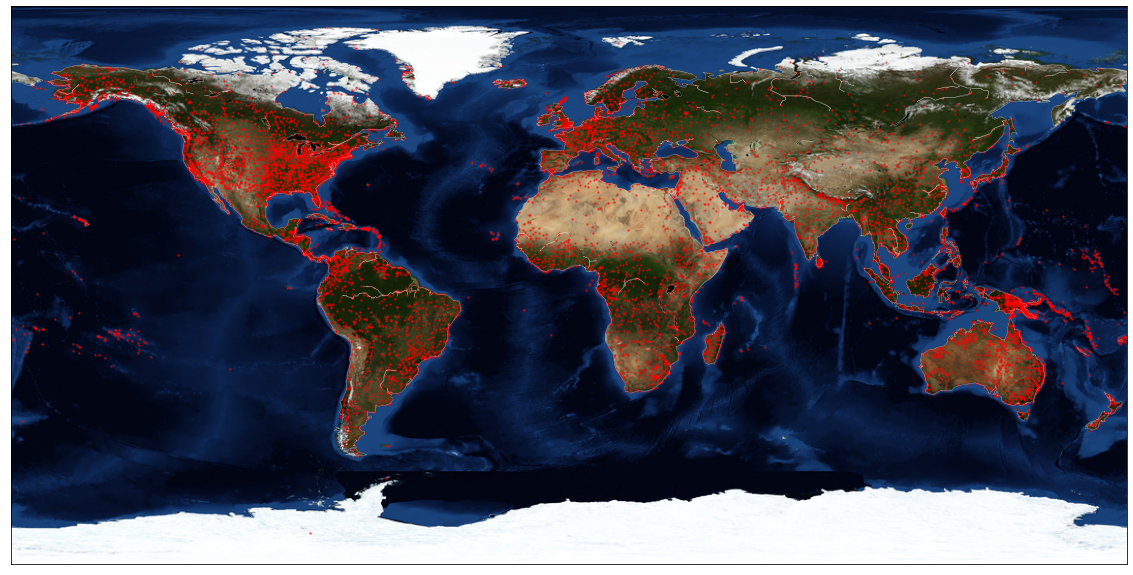

In [39]:
fig = plt.figure(figsize=(20, 15), edgecolor='w')
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.bluemarble(scale=0.2)   
m.drawcoastlines(color='white', linewidth=0.2)

m.scatter(airports['longitude'].values, airports['latitude'].values, latlon=True, alpha=0.5, color='r', s=2)

plt.tile("Airports around the world");

#### Plotting the routes

We will create a new dataframe that includes all routes along with their source and destination airport coordinates.

We must first add some airports that are missing from our airport database. Most of them are in Greenland and are small heliports.

In [56]:
added_airports = pd.DataFrame(np.array([
    ['AOQ', 'America/Godthab', 'Aappilattoq Airport', 'GL',  42,  -55.596111, 72.886944], 
    ['CMB', 'Asia/Calcutta', 'Bandaranaike International Airport', 'LK', 26,  79.883611, 7.181111], 
    ['IKE', 'America/Godthab', 'Ikerasak Heliport', 'GL', 66,  -51.303056, 70.498056],
    ['IOQ', 'America/Godthab', 'Isortoq Heliport', 'GL', 92,  -38.977778, 65.546667],
    ['IOT', 'America/Godthab', 'Illorsuit Heliport', 'GL', 154,  -53.555556, 71.239722],
    ['IUI', 'America/Godthab', 'Innaarsuit Heliport', 'GL', 95,  -56.011111, 73.2025],
    ['JUK', 'America/Godthab', 'Ukkusissat Heliport', 'GL', 223,  -51.883611, 71.055278],
    ['JUU', 'America/Godthab', 'Nuugaatsiaq Heliport', 'GL', 57,  -53.205, 71.538611],
    ['KGQ', 'America/Godthab', 'Kangersuatsiaq Heliport', 'GL', 112,  -55.536667, 72.381111],
    ['KHQ', 'America/Godthab', 'Kullorsuaq Heliport', 'GL', 148,  -57.235556, 74.579444],
    ['NIQ', 'America/Godthab', 'Niaqornat Heliport', 'GL', 10,  -53.656111, 70.788889],
    ['NSQ', 'America/Godthab', 'Nuussuaq Heliport', 'GL', 56,  -57.065, 74.109722],
    ['QFG', 'America/Godthab', 'Eqalugaarsuit Heliport', 'GL', 9,  -45.917222, 60.619722],
    ['QFN', 'America/Godthab', 'Narsaq Kujalleq Heliport', 'GL', 44,  -44.656111, 60.003611],
    ['QFX', 'America/Godthab', 'Igaliku Heliport', 'GL', 0,  -45.421944, 60.990833],
    ['QJH', 'America/Godthab', 'Qassimiut Heliport', 'GL', 29,  -47.1525, 60.779444],
    ['QOQ', 'America/Godthab', 'Saarloq Heliport', 'GL', 0,  -46.024722, 60.537778],
    ['QUV', 'America/Godthab', 'Aappilattoq Heliport', 'GL', 30,  -44.286944, 60.148333],
    ['QUW', 'America/Godthab', 'Ammassivik Heliport', 'GL', 71,  -45.378889, 60.595833],
    ['SRK', 'America/Godthab', 'Siorapaluk Heliport', 'GL', 102, -70.638333, 77.786389],
    ['SVR', 'America/Godthab', 'Savissivik Heliport', 'GL', 24, -65.1175, 76.018611],
    ['TQA', 'America/Godthab', 'Tasiusaq Heliport', 'GL', 181, -56.060278, 73.373056],
    ['TQI', 'America/Godthab', 'Tiniteqilaaq Heliport', 'GL', 15, -37.783333, 65.891944],
    ['UPK', 'America/Godthab', 'Upernavik Kujalleq Heliport', 'GL', 92, -55.531111, 72.152778]
]),
                              columns=['iata_code', 'time_zone_id', 'name', 'iso_country_code', 'elevation', 'longitude', 'latitude'])

In [57]:
#attach added airports to end of airports dataframe

airports = pd.concat([airports, added_airports], axis=0, ignore_index=True)

In [58]:
airports.tail(5)

iata_code     time_zone_id                         name iso_country_code  \
9784       SRK  America/Godthab          Siorapaluk Heliport               GL   
9785       SVR  America/Godthab          Savissivik Heliport               GL   
9786       TQA  America/Godthab            Tasiusaq Heliport               GL   
9787       TQI  America/Godthab        Tiniteqilaaq Heliport               GL   
9788       UPK  America/Godthab  Upernavik Kujalleq Heliport               GL   

     elevation   longitude   latitude  
9784       102  -70.638333  77.786389  
9785        24    -65.1175  76.018611  
9786       181  -56.060278  73.373056  
9787        15  -37.783333  65.891944  
9788        92  -55.531111  72.152778

In [59]:
#create separate dataframes for source and destination lookup coordinates (due to merge)
source_airport_coord = airports[['iata_code', 'longitude', 'latitude']].rename(columns={'iata_code': 'source_airport'})
destination_airport_coord = airports[['iata_code', 'longitude', 'latitude']].rename(columns={'iata_code': 'destination_airport'})

#merge both of the above dataframes into the routes dataset to include coordinates
routes_scoord = pd.merge(routes, source_airport_coord, how='left', on=['source_airport'])
routes_scoord.rename(columns={'longitude': 'source_longitude', 'latitude': 'source_latitude'}, inplace=True)
routes_coord = pd.merge(routes_scoord, destination_airport_coord, how='left', on=['destination_airport'])
routes_coord.rename(columns={'longitude': 'destination_longitude', 'latitude': 'destination_latitude'}, inplace=True)
routes_coord = routes_coord.astype({'source_longitude': 'float32', 'source_latitude': 'float32', 'destination_longitude': 'float32', 'destination_latitude': 'float32'})

In [60]:
routes_coord.head()

airline_code source_airport destination_airport  stops equipment  \
0           2B            AER                 KZN      0       CR2   
1           2B            ASF                 KZN      0       CR2   
2           2B            ASF                 MRV      0       CR2   
3           2B            CEK                 KZN      0       CR2   
4           2B            CEK                 OVB      0       CR2   

   source_longitude  source_latitude  destination_longitude  \
0         39.940094        43.443970              49.285515   
1         48.018906        46.280167              49.285515   
2         48.018906        46.280167              43.081650   
3         61.512863        55.301533              49.285515   
4         61.512863        55.301533              82.667000   

   destination_latitude  
0             55.607410  
1             55.607410  
2             44.226219  
3             55.607410  
4             55.009010

In [61]:
routes_arr = np.asarray(routes_coord[['source_longitude', 'source_latitude', 'destination_longitude', 'destination_latitude']])

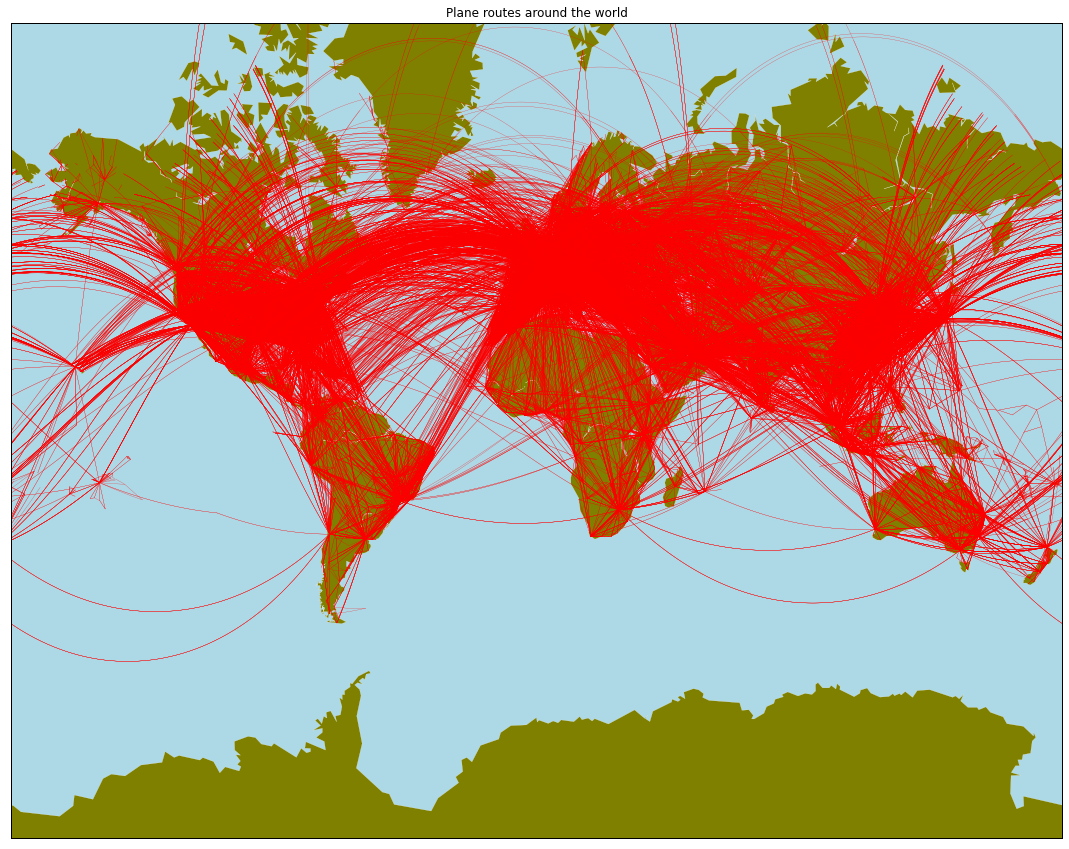

In [113]:
#Plot all routes using drawgreatcircle function from basemap
fig = plt.figure(figsize=(20, 15), edgecolor='w')
m = Basemap(projection='merc', resolution='c',
            llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180, lat_ts=20) 

m.drawcoastlines(color='white', linewidth=0.2)
m.fillcontinents(color='olive',lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

counter = 0
for route in np.delete(routes_arr, 33263, 0):
    #print(route)
    m.drawgreatcircle(route[0],route[1],route[2],route[3],linewidth=0.2, color='r', del_s = 1)
    #counter += 1

    
plt.title("Plane routes around the world")
plt.show()

#### Number of routes by airline

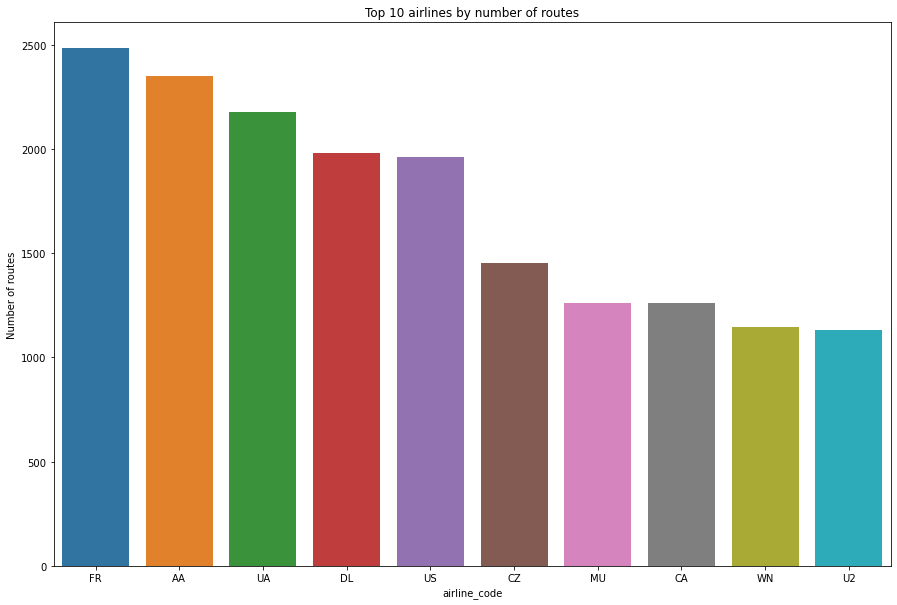

In [62]:
plt.figure(figsize=(15, 10))

sns.countplot(data=routes_coord, x='airline_code', order=routes_coord['airline_code'].value_counts().iloc[:10].index)

plt.ylabel('Number of routes')
plt.title('Top 10 airlines by number of routes');

Legend of airlines:
* FR: Ryanair
* AA: American Airlines
* UA: United Airlines
* DL: Delta Airlines
* US: US Airways (merged to UA in 2015)
* CZ: China Southern Airlines
* MU: China Eastern Airlines
* CA: Caribbean Airlines
* WN: Southwest Airlines
* U2: easyJet

#### Top airports by number of routes

In [63]:
#Add number of routes by taking source airports and destination airports into account
s_airp = routes_coord.groupby('source_airport')['airline_code'].count().sort_values(ascending=False)
d_airp = routes_coord.groupby('destination_airport')['airline_code'].count().sort_values(ascending=False)
airp_routes = s_airp.add(d_airp, fill_value=0)

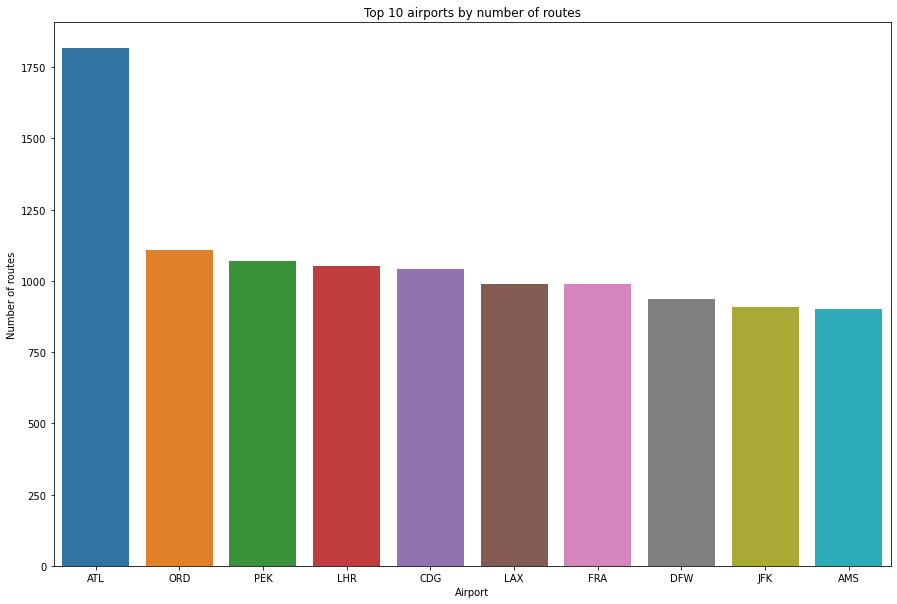

In [64]:
plt.figure(figsize=(15, 10))
sns.barplot(x=airp_routes.sort_values(ascending=False)[:10].index, y=airp_routes.sort_values(ascending=False)[:10].values)
plt.xlabel("Airport")
plt.ylabel("Number of routes")
plt.title("Top 10 airports by number of routes");

Legend of airports:
* ATL: Hartsfield-Jackson Atlanta International Airport
* ORD: Chicago O'Hare International Airport
* PEK: Beijing Capital International Airport
* LHR: London Heathrow Airport
* CDG: Paris Charles de Gaulle Airport
* LAX: Los Angeles International Airport
* FRA: Frankfurt International Airport
* DFW: Dallas/Fort Worth International Airport
* JFK: John F. Kennedy International Airport
* AMS: Amsterdam Airport Schiphol

#### Mapping airports by number of routes

In [65]:
#Create dataframe with airports, number of routes, and coordinates

airp_routes = airp_routes.to_frame(name='number_of_routes').reset_index()
airp_routes = airp_routes.rename(columns={'index': 'iata_code'})
airp_by_routes = pd.merge(airp_routes, airports, how='left', on='iata_code')
airp_by_routes = airp_by_routes.astype({'number_of_routes': 'int', 'longitude': 'float32', 'latitude': 'float32'})

In [66]:
#Needed values for visualization

lat_routes = airp_by_routes['latitude'].values
lon_routes = airp_by_routes['longitude'].values
n_routes = airp_by_routes['number_of_routes'].values

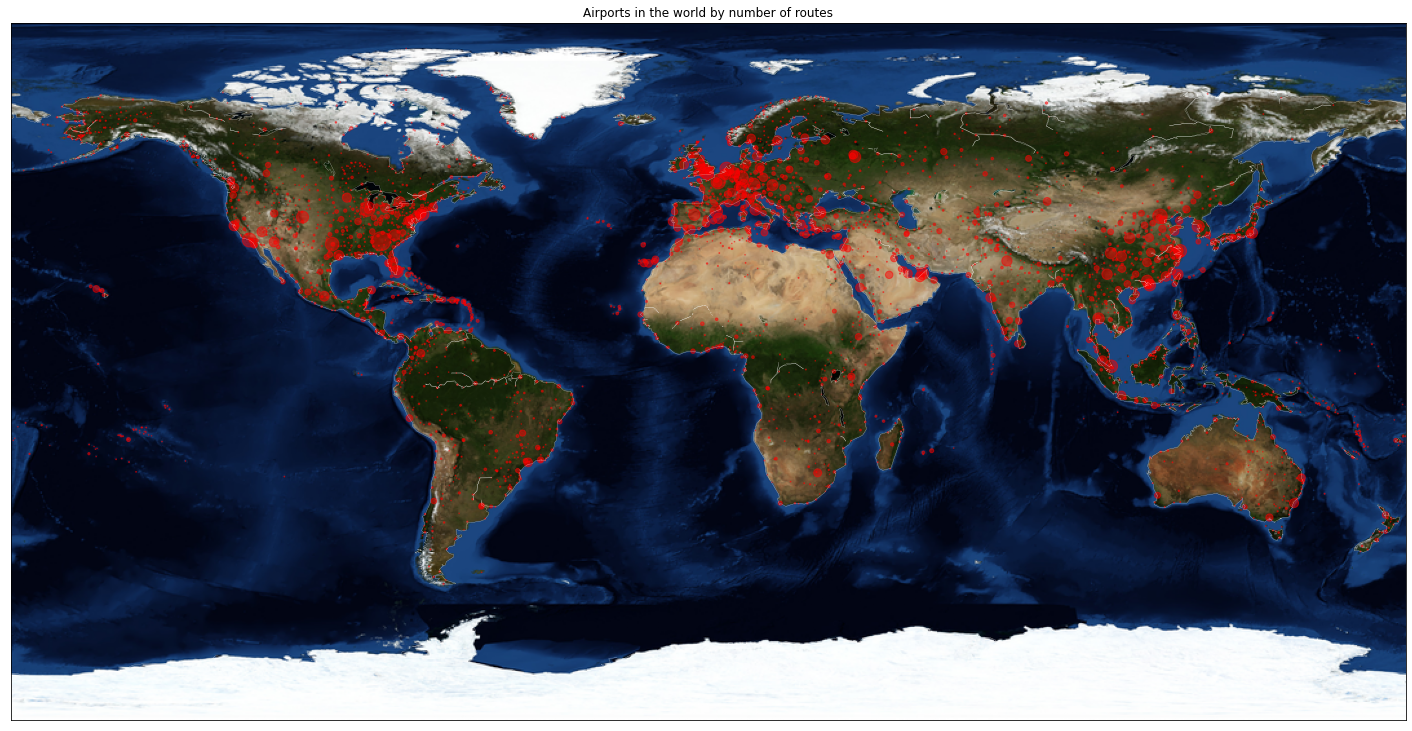

In [108]:
#Create map

fig = plt.figure(figsize=(25, 22), edgecolor='w')
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.bluemarble(scale=0.2)   
m.drawcoastlines(color='white', linewidth=0.2)

m.scatter(lon_routes, lat_routes, latlon=True, alpha=0.5, color='r', s=1/5*(n_routes))

plt.title('Airports in the world by number of routes');

#### Number of airports by country

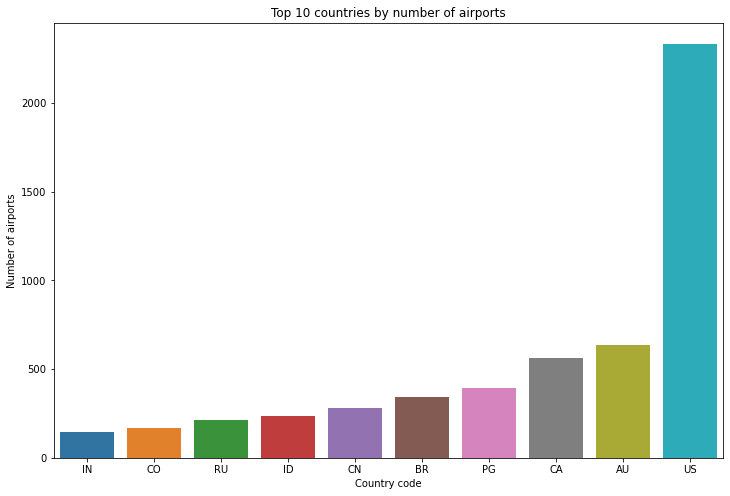

In [67]:
plt.figure(figsize=(12,8))

sns.barplot(x=airports.groupby('iso_country_code')['iata_code'].count().sort_values()[-10:].index, y=airports.groupby('iso_country_code')['iata_code'].count().sort_values()[-10:].values);
plt.xlabel('Country code')
plt.ylabel('Number of airports')
plt.title('Top 10 countries by number of airports');

Legend of countries:
* US: United States
* AU: Australia
* CA: Canada
* PG: Papua New Guinea
* BR: Brazil
* CN: China
* ID: Indonesia
* RU: Russia
* CO: Colombia
* IN: India

#### Top routes by distinct equipment

In [68]:
routes['distinct_aircrafts'] = routes.equipment.apply(np.char.count, sub=" ") + 1

In [69]:
routes.sort_values(by='distinct_aircrafts', ascending=False).head(10)

airline_code source_airport destination_airport  stops  \
20656           DL            DTW                 MSP      0   
49852           SK            CPH                 BGO      0   
49807           SK            BGO                 CPH      0   
18184           CZ            CAN                 SHA      0   
19004           CZ            SHA                 CAN      0   
52231           TK            ADB                 IST      0   
51549           SV            RUH                 JED      0   
52449           TK            IST                 ADB      0   
49738           SK            ARN                 CPH      0   
51439           SV            JED                 RUH      0   

                                 equipment  distinct_aircrafts  
20656  M90 M88 320 753 757 73H 777 319 738                   9  
49852  319 320 CR9 321 717 73G 73W 738 736                   9  
49807  320 319 CR9 321 717 73G 73W 738 736                   9  
18184  77W 738 777 321 772 333 330 AB6 320                   9  
19004  333 321 AB6 738 77W 777 772 330 320                   9  
52231  320 738 330 319 739 321 343 73W 77W                   9  
51549  321 320 333 772 773 777 744 E70 74E                   9  
52449  320 738 330 319 739 321 343 73W 77W                   9  
49738      73W 320 73H 321 319 73G 736 717                   8  
51439      333 777 773 321 320 772 744 74E                   8

The routes that have the biggest number of distinct aircrafts are Detroit-Minneapolis, Copenhaguen-Bergen, Guangzhou-Shanghai, Izmir-Istanbul, and Riyadh-Jeddah.

#### Top airlines by distinct equipment

In [70]:
#Create new dataframe
equipment = routes[['airline_code', 'equipment']]

#Join all different equipments from all different routes
airline_equips = equipment.groupby('airline_code')['equipment'].apply(' '.join).reset_index()

#Find the number of unique aircrafts for the equipments (using set)
airline_equips['unique_aircrafts'] = [len(set(x)) for x in airline_equips['equipment'].str.split(' ')]

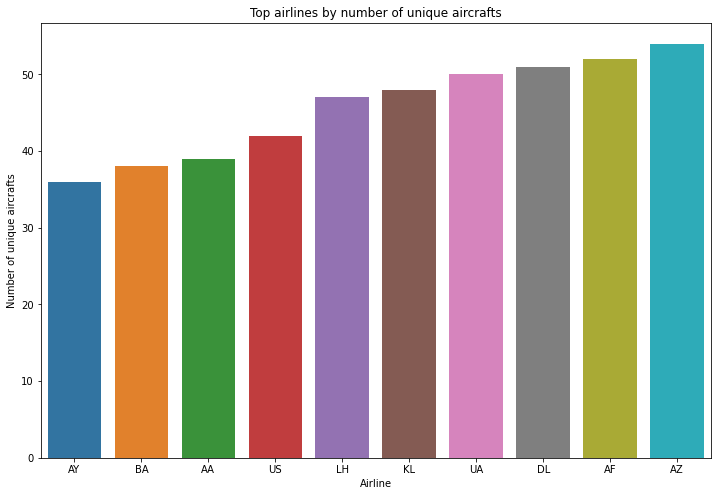

In [71]:
plt.figure(figsize=(12,8))

sns.barplot(x=airline_equips.sort_values(by='unique_aircrafts')['airline_code'].tail(10).values, y=airline_equips.sort_values(by='unique_aircrafts')['unique_aircrafts'].tail(10).values)
plt.ylabel('Number of unique aircrafts')
plt.xlabel('Airline')
plt.title('Top airlines by number of unique aircrafts');

Legend of airlines:
* AZ: Alitalia
* AF: Air France
* DL: Delta Airlines
* UA: United Airlines
* KL: KLM
* LH: Lufthansa
* US: US Airways (merged to UA in 2015)
* AA: American Airlines
* BA: British Airways
* AY: Finnair

#### Number of airports by continent

In [72]:
#Merge continent information to airports dataframe

airports = pd.merge(airports, continents[['iso_country_code', 'region', 'un_region_code']], on='iso_country_code', how='left')

In [73]:
airports[airports['region'].isnull()]

iata_code       time_zone_id                              name  \
2366       UKS  Europe/Simferopol                            Belbek   
8298       PRN    Europe/Belgrade    Pristina International Airport   
8555       SIP  Europe/Simferopol  Simferopol International Airport   

     iso_country_code elevation  longitude   latitude region  un_region_code  
2366               KX       344  33.566998  44.686646    NaN             NaN  
8298               XK      1758  21.032372  42.576439    NaN             NaN  
8555               KX       518   33.97007  45.039429    NaN             NaN

The airports which don't have a region are in disputed territories (Kosovo and Crimea), which don't have an official ISO code. However, they are both in Europe, so we will indicate them as such.

In [74]:
airports.fillna({'region': 'Europe', 'un_region_code': 150}, inplace=True)

In [75]:
cont_by_airp = airports.groupby('region')['iata_code'].count().sort_values().reset_index()

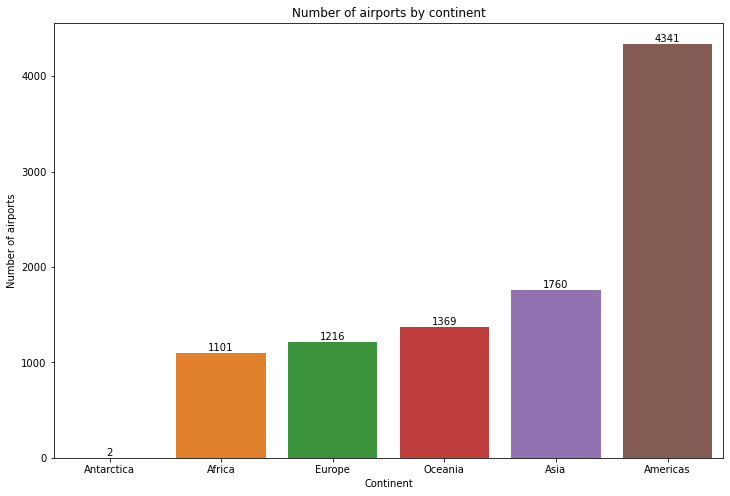

In [76]:
#Plot continents by number of airports
plt.figure(figsize=(12,8))

ax = sns.barplot(data=cont_by_airp, x='region', y='iata_code')

ax.bar_label(ax.containers[0])
plt.ylabel('Number of airports')
plt.xlabel('Continent')
plt.title('Number of airports by continent');

#### Type of routes

We will differentiate three types of routes: national (within a country), international (source and destination countries are different, but in the same continent), and intercontinental (source and destination countries are different and in a different continent).

In [77]:
#Create a new dataframe with the routes, source and destination countries and continents.
airports_s = airports.rename(columns={'iata_code': 'source_airport'})
routes_s = pd.merge(routes, airports_s[['source_airport', 'iso_country_code', 'region']], on='source_airport').rename(
    columns={'iso_country_code': 'source_country', 'region': 'source_region'})

airports_d = airports.rename(columns={'iata_code': 'destination_airport'})
routes_countries = pd.merge(routes_s, airports_d[['destination_airport', 'iso_country_code', 'region']], on='destination_airport').rename(
    columns={'iso_country_code': 'destination_country', 'region': 'destination_region'})

In [78]:
routes_countries.head()

airline_code source_airport destination_airport  stops equipment  \
0           2B            AER                 KZN      0       CR2   
1           2B            ASF                 KZN      0       CR2   
2           2B            CEK                 KZN      0       CR2   
3           2B            DME                 KZN      0       CR2   
4           S7            DME                 KZN      0       319   

   distinct_aircrafts source_country source_region destination_country  \
0                   1             RU        Europe                  RU   
1                   1             RU        Europe                  RU   
2                   1             RU        Europe                  RU   
3                   1             RU        Europe                  RU   
4                   1             RU        Europe                  RU   

  destination_region  
0             Europe  
1             Europe  
2             Europe  
3             Europe  
4             Europe

In [79]:
#Populate columns based on type of route
routes_countries['national_route'] = np.where(routes_countries['source_country'] == routes_countries['destination_country'], 1, 0)
routes_countries['intercontinental_route'] = np.where(routes_countries['source_region'] == routes_countries['destination_region'], 0, 1)

In [80]:
#Find the number of each type of route based on the conditions we gave
n_national = routes_countries['national_route'].sum()
n_continental = ((routes_countries['national_route'] + routes_countries['intercontinental_route']) == 0).sum()
n_intercontinental = ((routes_countries['national_route'] == 0) & (routes_countries['intercontinental_route'] == 1)).sum()

In [81]:
#Check the total equals total number of routes
n_national + n_continental + n_intercontinental

67645

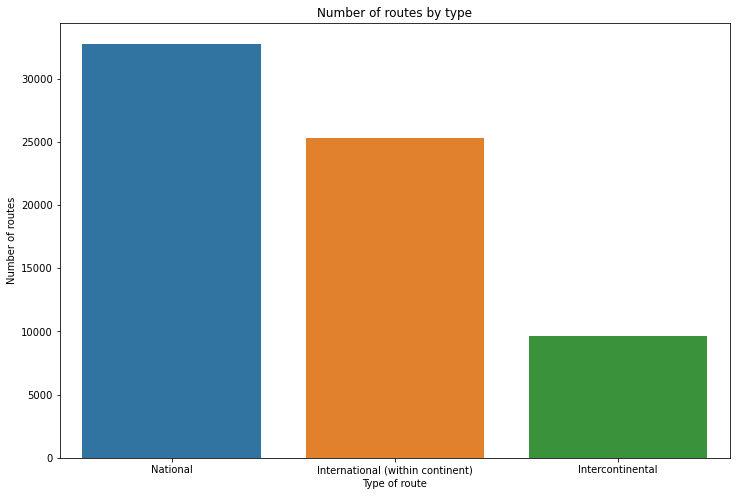

In [82]:
plt.figure(figsize=(12,8))

sns.barplot(x=['National', 'International (within continent)', 'Intercontinental'], y = [n_national, n_continental, n_intercontinental])
plt.xlabel("Type of route")
plt.ylabel("Number of routes")
plt.title("Number of routes by type");